In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

import h5py
from tqdm import tqdm_notebook

%matplotlib inline

%run ../src/count_matrix_metrics.py
%run ../src/utils.py

## Slide-seq

In [3]:
adata = load_slide_seq(data_path="../data/slide_seq_ob/")
adata = adata[(adata.obs["x"].values > 500) & (adata.obs["x"].values < 5000) & (adata.obs["y"].values > 800)]

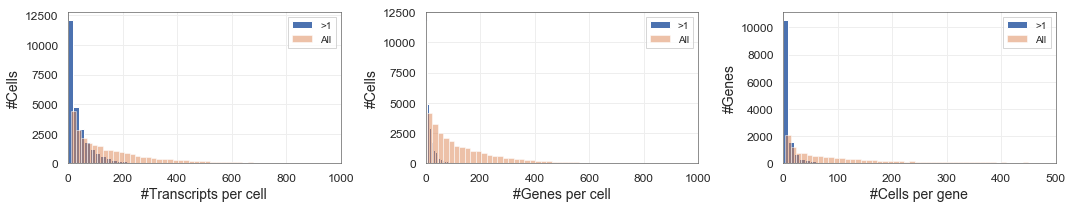

In [4]:
plot_expression_metrics(adata.X, xlim1=1000, xlim2=1000, xlim3=500);

Worth to note that absolute majority of transcripts are located in the right tail and not shown on the plots above:

In [5]:
n_transcripts = np.array(adata.X.sum(axis=1))
print("#transcripts on the plot: {}".format(int(n_transcripts[n_transcripts < 1000].sum())))
print("Total #transcripts: {}".format(int(n_transcripts.sum())))

#transcripts on the plot: 4317835
Total #transcripts: 4464684


In [6]:
get_expression_value_fracs(adata.X)

1       88.584%
2        8.478%
3        1.603%
4        0.522%
5        0.235%
6        0.125%
7        0.083%
8        0.058%
9        0.044%
>=10     0.269%
dtype: object

In [7]:
get_scalar_metrics(adata.X)

,#Cells,#Genes,#Transcripts,Sparsity Level
0,26172,14359,4464684.0,0.990205


#### Visualize

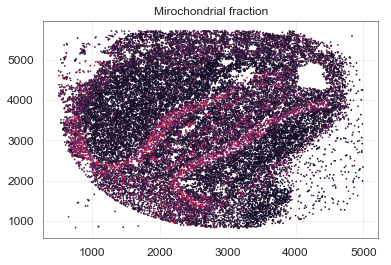

In [8]:
plt.scatter(adata.obs.x, adata.obs.y, c=adata.obs.mit_frac, s=0.5);
plt.title("Mirochondrial fraction");

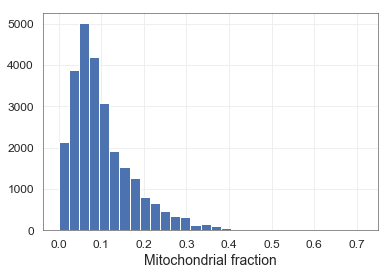

In [9]:
adata.obs.mit_frac.hist(bins=30);
plt.xlabel("Mitochondrial fraction");

In [10]:
%time adata_processed = process_scanpy(adata, cl_resolution=0.3, n_neighbors=10)

CPU times: user 6min 39s, sys: 1min, total: 7min 39s
Wall time: 1min 1s


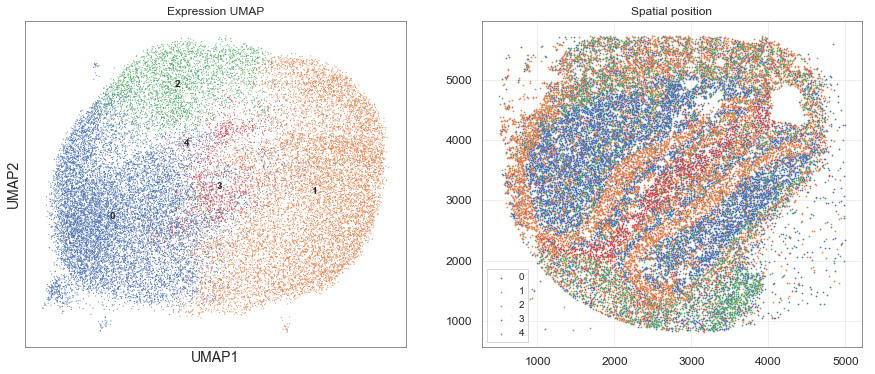

In [11]:
plot_clusters_spatial(adata_processed, titles=["Expression UMAP", "Spatial position"])

### Merge

In [ ]:
adata_collapsed = merge_slide_seq_beads(adata, grid_size=101)

In [ ]:
adata_collapsed.obs.mit_frac.hist(bins=30);

In [ ]:
plot_expression_metrics(adata_collapsed.X, xlim1=2000, xlim2=2000, xlim3=500);

In [ ]:
get_expression_value_fracs(adata_collapsed.X)

In [ ]:
get_scalar_metrics(adata_collapsed.X)

#### Visualize

In [ ]:
%time adata_collapsed_processed = process_scanpy(adata_collapsed, cl_resolution=0.4)

In [ ]:
plot_clusters_spatial(adata_collapsed_processed, s=10, figsize=(20, 10), titles=["Expression UMAP", "Spatial position"])

In [ ]:
plt.scatter(adata_collapsed.obs.x, adata_collapsed.obs.y, c=adata_collapsed[:,"Pbx1"].X, s=2);
# plt.title("Mirochondrial fraction");

### Merge hard

In [ ]:
adata_collapsed_hard = merge_slide_seq_beads(adata, grid_size=20)

In [ ]:
adata_collapsed_hard.obs["n_merged"].hist(bins=20);

In [ ]:
adata_collapsed_hard = adata_collapsed_hard[adata_collapsed_hard.obs["n_merged"].values > 25,:]
plot_expression_metrics(adata_collapsed_hard.X, xlim1=80000, xlim2=8000, xlim3=300);

In [ ]:
get_expression_value_fracs(adata_collapsed_hard.X)

In [ ]:
get_scalar_metrics(adata_collapsed_hard.X)

#### Visualization

In [ ]:
fig = plt.figure(figsize=(5, 5))
adata_collapsed_hard_processed = process_scanpy(adata_collapsed_hard, n_neighbors=10, do_log=True, n_od_genes=1000)
plot_clustering(adata_collapsed_hard_processed)

## SpatialTranscriptomics

In [ ]:
adata_st = load_spatial_transcriptomics("../data/spatial_transcriptomics_ob/Rep1_MOB_count_matrix-1.tsv")

In [ ]:
plot_expression_metrics(adata_st.X, xlim1=80000, xlim2=8000, xlim3=300, figsize=(15, 3));

In [ ]:
get_expression_value_fracs(adata_st.X)

In [ ]:
get_scalar_metrics(adata_st.X)

In [ ]:
adata_st_processed = process_scanpy(adata_st, n_neighbors=10, do_log=True, n_od_genes=1000)
plot_clusters_spatial(adata_st_processed, s=40, titles=["Expression UMAP", "Spatial position"])